In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import networkx as nx
from mpmath import mp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
import sys

sys.path.append('/home/lg/ICML2025_project/scripts_pushpull_differ_lr')
from network_utils import *
sys.path.append("/home/lg/ICML2025_project/utils")
from algebra_utils import *

In [6]:
n=16
A, B = generate_nearest_neighbor_matrices(n = n, k=3, seed=42)

pi_a = get_left_perron(A)
pi_b = get_right_perron(B)

print(pi_a,'\n\n')
print(pi_b)
show_row(A)
show_col(B)

[0.06919303 0.07172633 0.04138785 0.05398838 0.04818718 0.04422822
 0.06784823 0.04848886 0.08618899 0.12598236 0.06004822 0.05597314
 0.06906678 0.05234355 0.04393945 0.06140943] 


[0.05913782 0.03356218 0.07704569 0.05311909 0.04314017 0.04092395
 0.06305419 0.08887869 0.05447529 0.08655559 0.0394761  0.1147142
 0.06007338 0.06832506 0.04708025 0.07043835]
A的第二大特征值: 0.8711614535866962
A的beta: 0.8812264032826911
A的spectral gap: 0.11877359671730892
A的kappa: 3.0439457443122366
S_A是: 142.3316073222403 

B的第二大特征值: 0.8856455892591085
B的beta: 0.8975362193664002
B的spectral gap: 0.10246378063359984
B的kappa: 3.417960286115987
S_B是: 174.03566035145127 



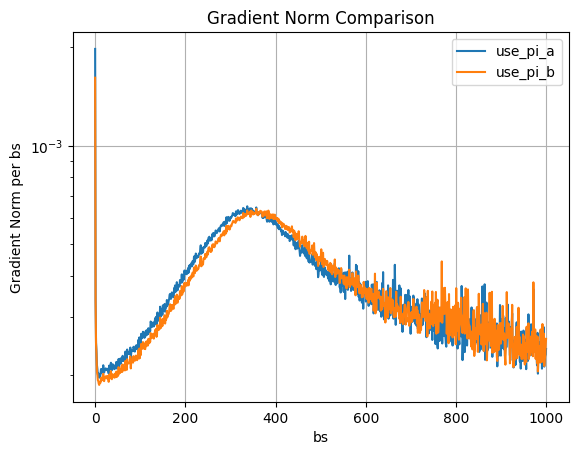

In [4]:
df1 = pd.read_csv('./neighbor_tmp/use_pi_agrad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.007749619316755874, n_nodes=16, batch_size=128, 2025-07-17.csv')
df2 = pd.read_csv('./neighbor_tmp/use_pi_b_grad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.0066234356058318625, n_nodes=16, batch_size=128, 2025-07-17.csv')
end = 1000
plt.plot(df1["avg_grad_norm"][:end], label='use_pi_a')
plt.plot(df2["avg_grad_norm"][:end], label='use_pi_b')
plt.yscale('log')
plt.xlabel('bs')
plt.ylabel('Gradient Norm per bs')
plt.title('Gradient Norm Comparison')
plt.legend()
plt.grid(True)
plt.show()

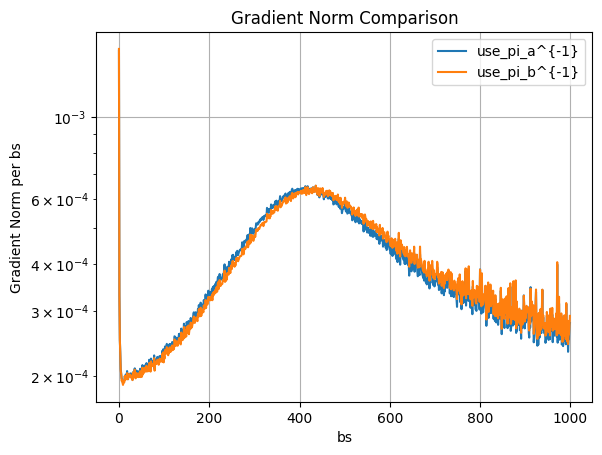

In [6]:
df1 = pd.read_csv('./neighbor/pi_a_inverse_grad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.005854361269705877, n_nodes=16, batch_size=128, 2025-07-17.csv')
df2 = pd.read_csv('./neighbor/pi_b_inverse_grad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.006670587521813699, n_nodes=16, batch_size=128, 2025-07-17.csv')
end = 1000
plt.plot(df1["avg_grad_norm"][:end], label='use_pi_a^{-1}')
plt.plot(df2["avg_grad_norm"][:end], label='use_pi_b^{-1}')
plt.yscale('log')
plt.xlabel('bs')
plt.ylabel('Gradient Norm per bs')
plt.title('Gradient Norm Comparison')
plt.legend()
plt.grid(True)
plt.show()

#### 目前的$\kappa_A,\kappa_B$太小了

In [17]:
import networkx as nx
maximum = 1
index = 0
n=16
for i in range(100000):
    A, B = generate_nearest_neighbor_matrices(n = n, k=3, seed=i)
    kappa_A = compute_kappa_row(A)
    if kappa_A > maximum and kappa_A <1000 and nx.is_strongly_connected(nx.DiGraph(A)):
        maximum = kappa_A
        index = i
        print(f"New maximum kappa_A: {maximum} at seed {index}")

New maximum kappa_A: 3.0942760205103848 at seed 0
New maximum kappa_A: 8.55667990386174 at seed 1
New maximum kappa_A: 9.627470147708012 at seed 4
New maximum kappa_A: 10.075877865675302 at seed 46
New maximum kappa_A: 19.186021804887083 at seed 51
New maximum kappa_A: 31.146356368927318 at seed 641
New maximum kappa_A: 32.44947782449675 at seed 847
New maximum kappa_A: 46.73677980398796 at seed 1145
New maximum kappa_A: 54.048591411310014 at seed 3581
New maximum kappa_A: 61.54489905169853 at seed 3718
New maximum kappa_A: 64.80307042025329 at seed 9156
New maximum kappa_A: 65.7291624566851 at seed 9872
New maximum kappa_A: 82.84899828377407 at seed 13875
New maximum kappa_A: 110.58771176110568 at seed 19142
New maximum kappa_A: 131.8866520201014 at seed 51583


In [19]:
n=16
A, B = generate_nearest_neighbor_matrices(n = n, k=3, seed=51583)

pi_a = get_left_perron(A)
pi_b = get_right_perron(B)

print(pi_a,'\n\n')
print(pi_b)
show_row(A)
show_col(B)

[0.01525318 0.15047166 0.15947424 0.00173332 0.02137852 0.22860118
 0.07973712 0.0172105  0.00381329 0.03863969 0.00332219 0.0032933
 0.20480865 0.04333505 0.02661705 0.00231109] 


[0.03629473 0.00172607 0.00331843 0.1365555  0.01336136 0.00255264
 0.01769831 0.03593501 0.06533051 0.02184755 0.18338389 0.25215285
 0.0020097  0.01717889 0.03054537 0.18010918]
A的第二大特征值: 0.9519179996804673
A的beta: 0.9526103084952942
A的spectral gap: 0.047389691504705844
A的kappa: 131.8866520201014
S_A是: 992.948916967492 

B的第二大特征值: 0.9647180831897181
B的beta: 0.9648680329714052
B的spectral gap: 0.03513196702859478
B的kappa: 146.0848014519697
S_B是: 1362.6762839855626 



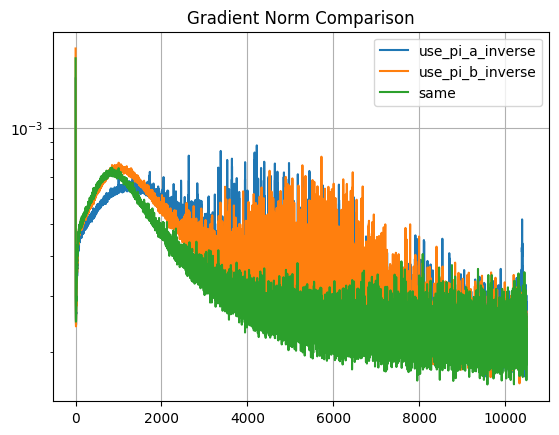

In [60]:
df1 = pd.read_csv('/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/seed_51583_pi_a_inversegrad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.0033865565302192476, n_nodes=16, batch_size=128, 2025-07-17.csv')
df2 = pd.read_csv('/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/seed_51583_pi_b_inversegrad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.0014480187874301624, n_nodes=16, batch_size=128, 2025-07-17.csv')
df3 = pd.read_csv("/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/seed_51583_uniformgrad_norm,hetero=True,s alpha=1000, PushPull, lr[0]=0.007, n_nodes=16, batch_size=128, 2025-07-17.csv")
end = 20000
plt.plot(df1["avg_grad_norm"][:end], label='use_pi_a_inverse')
plt.plot(df2["avg_grad_norm"][:end], label='use_pi_b_inverse')
plt.plot(df3["avg_grad_norm"][:end], label='same')
plt.yscale('log')
plt.title('Gradient Norm Comparison')
plt.legend()
plt.grid(True)
plt.show()

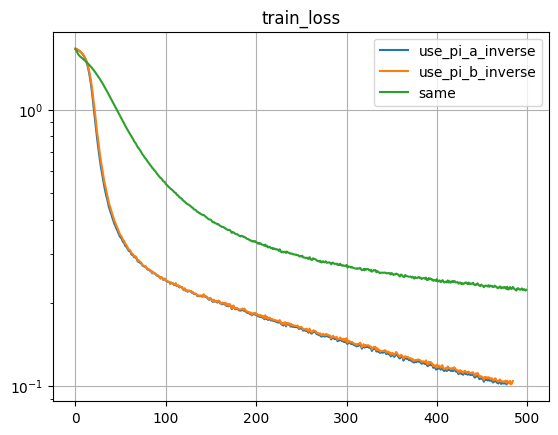

In [61]:
df1 = pd.read_csv('/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/pi_a_inverse_hetero=True, alpha=1000, PushPull, lr[0]=0.005854361269705877, n_nodes=16, batch_size=128, 2025-07-17.csv')
df2 = pd.read_csv("/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/pi_b_inverse_hetero=True, alpha=1000, PushPull, lr[0]=0.006670587521813699, n_nodes=16, batch_size=128, 2025-07-17.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/seed_51583_uniformhetero=True, alpha=1000, PushPull, lr[0]=0.007, n_nodes=16, batch_size=128, 2025-07-17.csv")
end = 10000
s = "train_loss(total)"
plt.plot(df1[s][:end], label='use_pi_a_inverse')
plt.plot(df2[s][:end], label='use_pi_b_inverse')
plt.plot(df3[s][:end], label='same')
plt.yscale('log')
plt.title('train_loss')
plt.legend()
plt.grid(True)
plt.show()

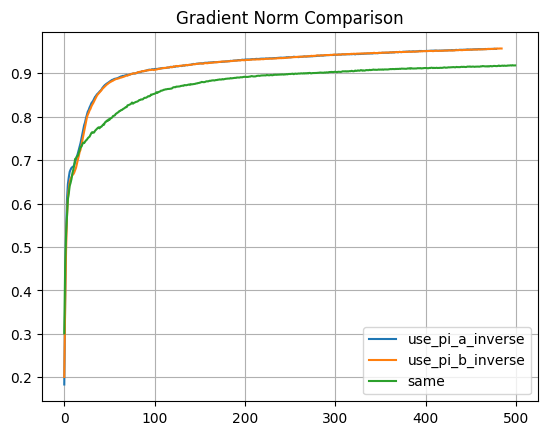

In [63]:
df1 = pd.read_csv('/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/pi_a_inverse_hetero=True, alpha=1000, PushPull, lr[0]=0.005854361269705877, n_nodes=16, batch_size=128, 2025-07-17.csv')
df2 = pd.read_csv("/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/pi_b_inverse_hetero=True, alpha=1000, PushPull, lr[0]=0.006670587521813699, n_nodes=16, batch_size=128, 2025-07-17.csv")
df3 = pd.read_csv("/home/lg/ICML2025_project/NEW_PROJECT_20250717/init_test_mnist_0717/neighbor/seed_51583_uniformhetero=True, alpha=1000, PushPull, lr[0]=0.007, n_nodes=16, batch_size=128, 2025-07-17.csv")
end = 10000
s = "test_accuracy(average)"
plt.plot(df1[s][:end], label='use_pi_a_inverse')
plt.plot(df2[s][:end], label='use_pi_b_inverse')
plt.plot(df3[s][:end], label='same')
plt.title('Gradient Norm Comparison')
plt.legend()
plt.grid(True)
plt.show()